Importing Necessary Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing Train and Test Data

In [ ]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

Analysing the type of variables train set contains

Task 1 (EDA)

In [ ]:
train.dtypes

City                      int64
Location_Score          float64
Internal_Audit_Score      int64
External_Audit_Score      int64
Fin_Score                 int64
Loss_score                int64
Past_Results              int64
IsUnderRisk               int64
dtype: object

In [ ]:
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [ ]:
train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


Analysing whether train set has null values or not

In [ ]:
train.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

Analysing the test dataset

In [ ]:
test.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,41,18.272,13,12,9,7,0
1,17,64.799,6,10,7,4,1
2,31,68.890,3,3,7,8,0
3,3,16.492,15,10,7,4,1
4,9,17.178,7,3,8,3,1


Looking for null values in test dataset

In [ ]:
test.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
dtype: int64

Checking the distribution of IsUnderRisk variable

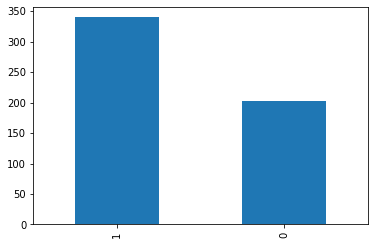

In [ ]:
train.IsUnderRisk.value_counts().plot(kind='bar')

**Boxplot for continuouse variables**

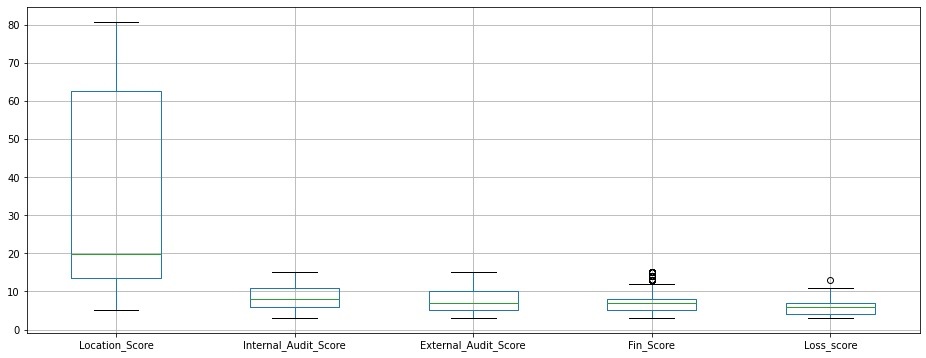

In [ ]:
plt.figure(figsize=(16,6))
train.boxplot(column=['Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score'])

**Histogram on Continuose Variables**

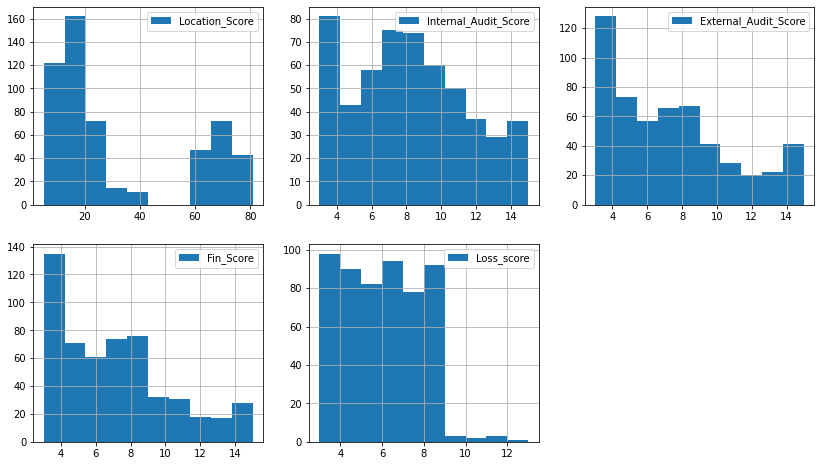

In [ ]:
plt.figure(figsize=(14,8))

columns = ['Location_Score', 'Internal_Audit_Score', 'External_Audit_Score', 'Fin_Score', 'Loss_score']
for i,j in zip(range(1,6),columns):
    plt.subplot(2,3,i)
    train[j].hist(label=j)
    plt.legend()

**Density Plot On Continuose Variables**

<Figure size 1008x576 with 0 Axes>

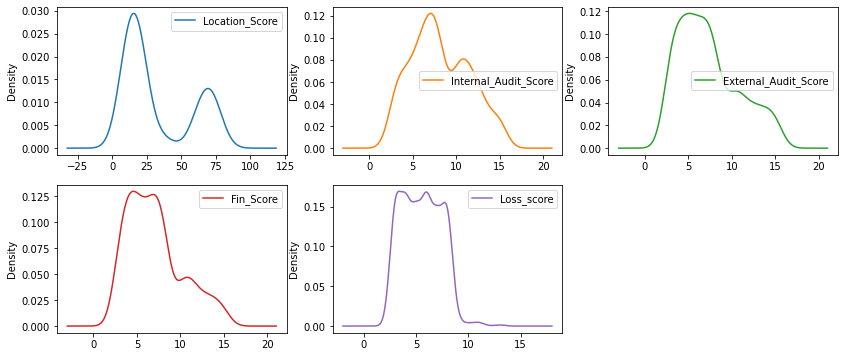

In [ ]:
plt.figure(figsize=(14,8))
train[columns].plot(kind='density', subplots=True, layout=(2,3), sharex=False, sharey=False, figsize=(14,6))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


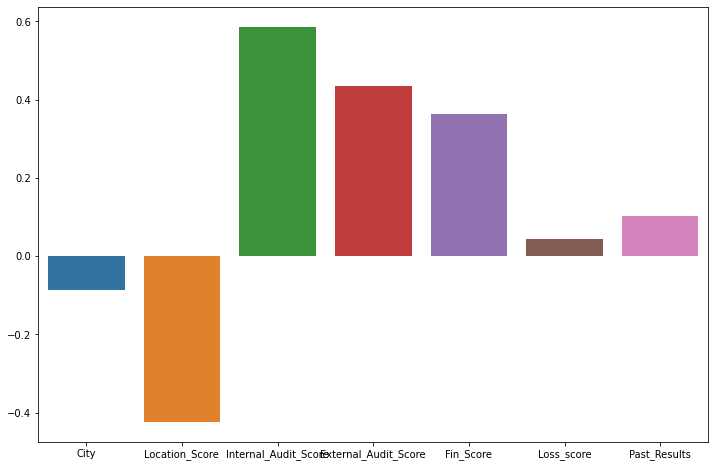

In [ ]:
plt.figure(figsize = (12,8))
datacor = train.drop(['IsUnderRisk'], axis = 1)
sns.barplot(datacor.columns,datacor.corrwith(train['IsUnderRisk']))

**Correlation Matrix Plot**

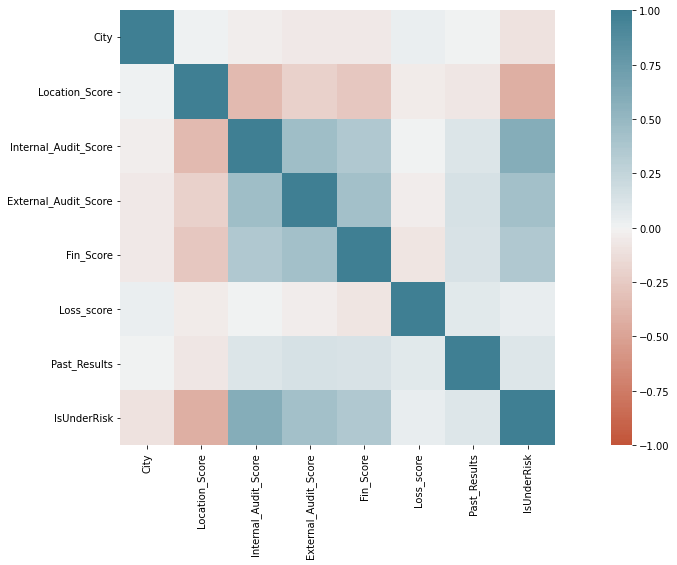

In [ ]:
plt.figure(figsize=(20,8))
corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

Modeling

In [ ]:
X = train.iloc[:, train.columns != 'IsUnderRisk']  # Removing the Target variable from the x variable
y = train.iloc[:, train.columns == 'IsUnderRisk']  # Taking only the target variable in y variable

Importing the necessary libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)  # Spliting in 80 20 ratio

Logistic Regression


Since the IsUnitRisk is a binary variable we would be applying logistic regression as it works the best for binary classification problem

In [ ]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Predicting

In [ ]:
reg.predict(X_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1])

Measuring the accuracy against the training dataset

In [ ]:
reg.score(X_test,y_test)

0.7522935779816514

In [ ]:
import tensorflow as tf

Task 2 and 3

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.InputLayer(input_shape=(7, )),
                             tf.keras.layers.Dense(3, ),
                             tf.keras.layers.Dropout(0.05), 
                             tf.keras.layers.Dense(1, activation='sigmoid') 
])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.006), loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 24        
                                                                 
 dropout (Dropout)           (None, 3)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train, epochs=50)

Epoch 1/50
14/14 [==============================] - 1s 2ms/step - loss: 7.4719
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.8817
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.7764
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6220
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5988
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5771
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5386
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5627
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5593
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5075
Epoch 11/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4914
Epoch 12/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5365
Epoch 13/50
14/14 [==============================

In [ ]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.4860


0.48603078722953796

In [ ]:
model.predict(X_test)

array([[0.9747244 ],
       [0.83101475],
       [0.8737514 ],
       [0.3022874 ],
       [0.26943207],
       [0.975597  ],
       [0.9642793 ],
       [0.9889968 ],
       [0.9838995 ],
       [0.80126   ],
       [0.96324515],
       [0.35847598],
       [0.86192036],
       [0.6557438 ],
       [0.9302242 ],
       [0.5503023 ],
       [0.3480034 ],
       [0.94649935],
       [0.16598806],
       [0.97181296],
       [0.6590353 ],
       [0.4976173 ],
       [0.27360266],
       [0.7706535 ],
       [0.05295691],
       [0.10249409],
       [0.71121705],
       [0.75900483],
       [0.8042045 ],
       [0.90568465],
       [0.22492468],
       [0.12198043],
       [0.87585604],
       [0.32167125],
       [0.42370027],
       [0.96084315],
       [0.7206323 ],
       [0.7616928 ],
       [0.9481057 ],
       [0.91770005],
       [0.03406584],
       [0.9641007 ],
       [0.68713236],
       [0.14750469],
       [0.16086292],
       [0.13226715],
       [0.08695257],
       [0.917

Task 4

AUC-ROC Score 

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, reg.predict_proba(X_test)[:, 1])

0.8669296987087517

One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
Y = np.array(y)
y_ = Y.reshape(-1,1)
y_

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [ ]:
encoder = OneHotEncoder(sparse=False)
y_new = encoder.fit_transform(y_)
y_new

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y_new,test_size=0.2)

Task 5

In [ ]:
model2 = tf.keras.Sequential([
                             tf.keras.layers.InputLayer(input_shape=(7, )),
                             tf.keras.layers.Dense(3, ),
                             tf.keras.layers.Dense(2, activation='softmax')
])
model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.006), loss='categorical_crossentropy')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 24        
                                                                 
 dense_3 (Dense)             (None, 2)                 8         
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.fit(X_test,y_test, epochs=50)

Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 5.5819
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 4.1764
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 1.8584
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 2.1758
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 1.9900
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 2.7789
Epoch 7/50
4/4 [==============================] - 0s 4ms/step - loss: 3.6019
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 1.9568
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 1.7348
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: 1.8931
Epoch 11/50
4/4 [==============================] - 0s 4ms/step - loss: 1.2335
Epoch 12/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9311
Epoch 13/50
4/4 [==============================] - 0s 4ms/step - loss: 1.

In [ ]:
model2.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.6880


0.6879958510398865

In [ ]:
model2_predict = model2.predict(x_test)

Task 6

Log Loss Score

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test,model2_predict)

0.6879958098224543